In [8]:
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('bmh')
from scipy.fftpack import fft, fftshift
from scipy.signal import hamming, boxcar

## TDDTFT de una señal chrip lineal

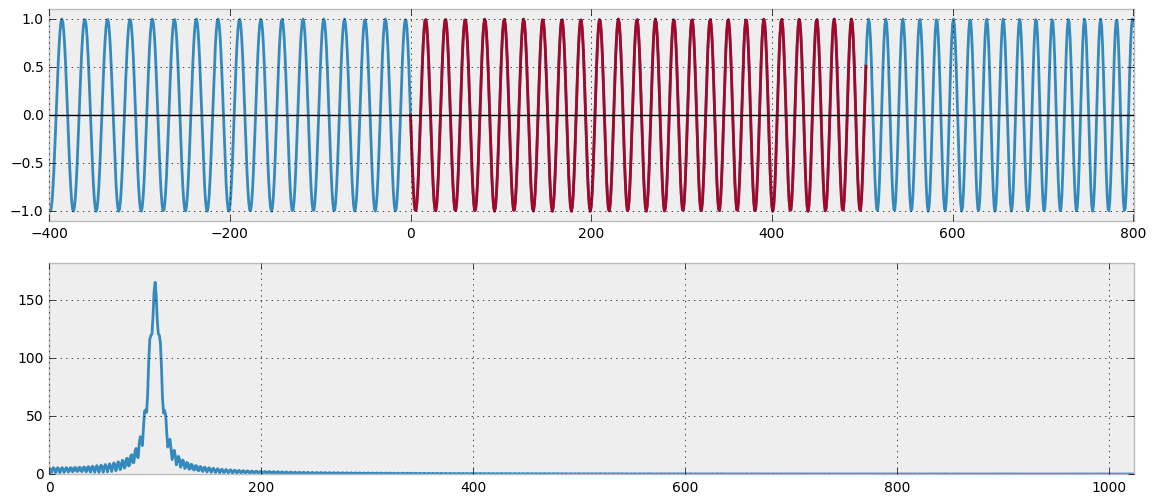

In [13]:
L = 505
w = boxcar(L)
alpha0 = 15e-6*np.pi
def chirp_plot(n=0):
    m = np.r_[-400:801:1]
    mn = np.select([(m + n) > 0], [m + n])
    x = np.sin(alpha0*mn**2)
    plt.subplots(2, 1, figsize=(14, 6))
    plt.subplot(211)
    plt.plot(m, x)
    nw = np.r_[0:L:1] 
    xw = w*x[400+nw]
    plt.plot(nw, xw)
    plt.axhline(0, color='k', lw=1)
    plt.axis([-400, 801, -1.1, 1.1])
    plt.grid(True)
    plt.subplot(212)
    Nfft = 2048
    X = fft(xw, Nfft)
    mX = np.abs(X)
    plt.plot(np.r_[0:int(Nfft/2):1], mX[0:int(Nfft/2)])
    plt.axis([0, Nfft/2, 0, 1.1*np.max(mX)])
interact(chirp_plot, n = (0, 3000, 100))

## Espectrogramas de la TDDTFT

In [14]:
from scipy.signal import spectrogram
alpha0 = 15e-6*np.pi
n1 = np.r_[0:20001:1]
y1 = np.cos(alpha0*n1**2)
n2 = np.r_[20000:25001:1]
y2 = np.cos(0.2*np.pi*n2)
n3 = np.r_[25000:30001:1]
y3 = np.cos(0.2*np.pi*n3) + np.cos(0.23*np.pi*n3)
n = np.r_[n1, n2, n3]
y = np.r_[y1, y2, y3]
Nfft = 1024

* L = 401

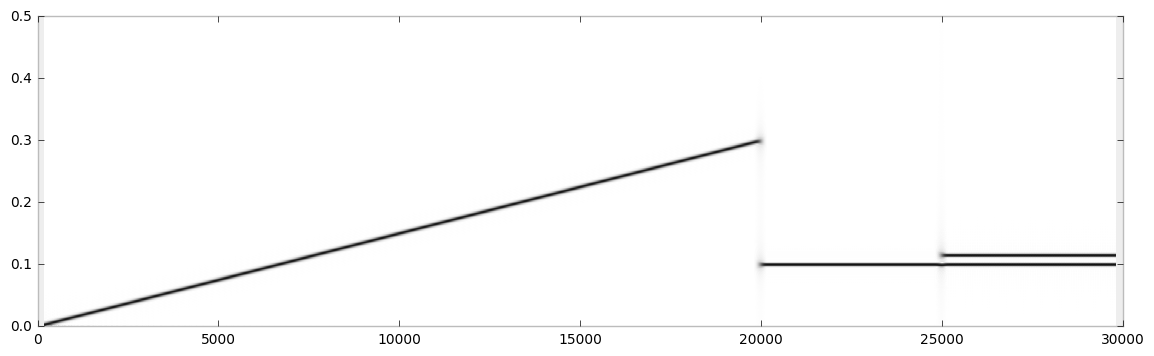

In [15]:
L = 401
w = hamming(L)
plt.subplots(1, 1, figsize=(14, 4))
o, m, Ym1 = spectrogram(y, nperseg=L, window=w, noverlap=L-1, nfft=Nfft, mode='magnitude')
plt.pcolormesh(m, o, Ym1, cmap=plt.cm.gray_r)

* L = 101

MemoryError: 

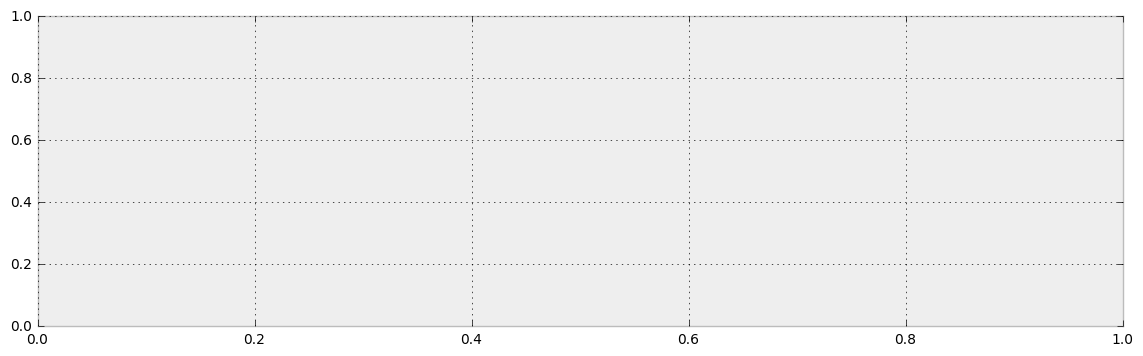

In [16]:
L = 101
w = hamming(L)
plt.subplots(1, 1, figsize=(14, 4))
o, m, Ym2 = spectrogram(y, nperseg=L, window=w, noverlap=L-1, nfft=Nfft, mode='magnitude')
plt.pcolormesh(m, o, Ym2, cmap=plt.cm.gray_r)

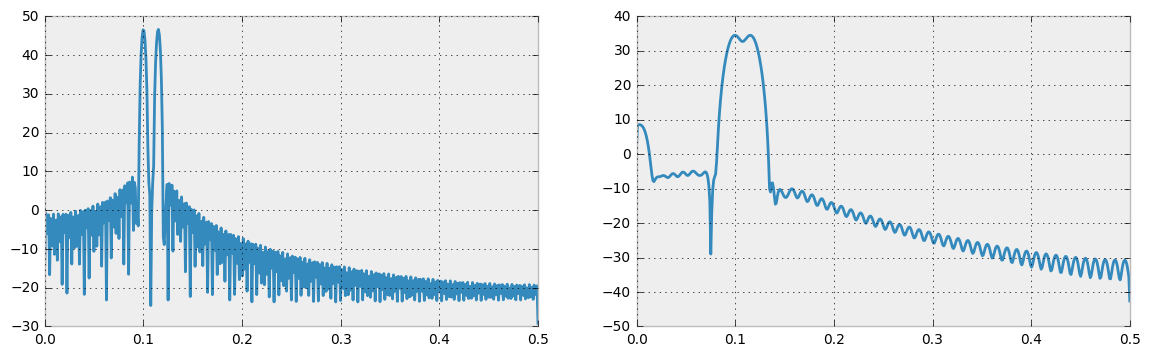

In [6]:
plt.subplots(1, 2, figsize=(14, 4))
plt.subplot(121)
plt.plot(o, 20*np.log10(Ym1[:, 27000]))
plt.subplot(122)
plt.plot(o, 20*np.log10(Ym2[:, 27000]))